[link text](https://)Data preprocess and model implementation for the **Boston Housing dataset**.  

(Task 1 & 2)

# **Task 1: Acquire, preprocess, and analyze the data**

In [ ]:
!pip install requests

## 1. Loading the dataset


In [ ]:
import requests

url = "http://lib.stat.cmu.edu/datasets/boston"
response = requests.get(url)
data = response.text

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
lines = data.splitlines()

columns = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"
]

data_lines = lines[22:]

merged_data_lines = []
for i in range(0, len(data_lines) - 1, 2):
    merged_line = data_lines[i] + data_lines[i + 1]
    merged_data_lines.append(merged_line)

df = pd.DataFrame([line.split() for line in merged_data_lines], columns=columns, dtype=float)

## 2. Cleaning the data

In [ ]:
df = df.drop(columns=['B'])

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [ ]:
df[df.eq('?').any(1)]

<ipython-input-44-3abdad45affd>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq('?').any(1)]


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV


In [ ]:
df.isin(['?']).sum(axis=0)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

## 3. Computing Basic Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


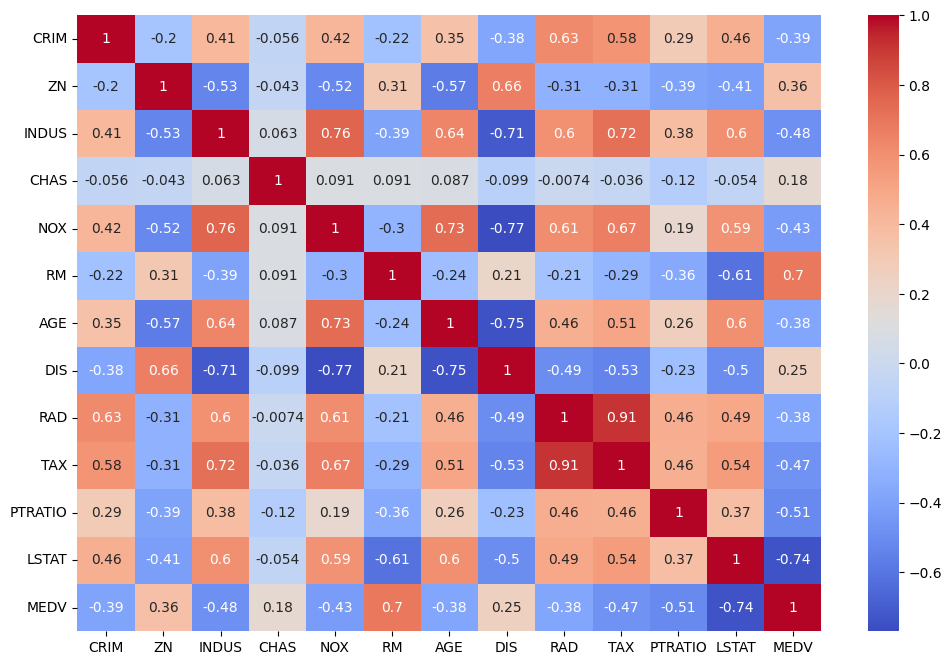

In [ ]:
# plot the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'LSTAT'}>],
       [<Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

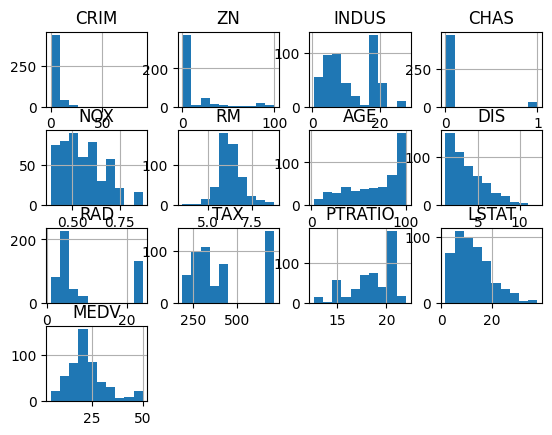

In [ ]:
df.hist()

# **Task 2: Implement the models**

### Linear Regression

In [ ]:
# Create the Linear Regression Model class for the Boston dataset
class LinearRegression:
    def __init__(self):
        self.theta = None  # Initialize weights to None

    def fit(self, X, y):
        # Compute the optimal parameters theta using the Normal Equation
        self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
        return self

    def predict(self, X):
        return X.dot(self.theta)

    def mse(self, y, yh):
        return ((y - yh) ** 2).mean()

    def plot(self, y, yh):
        plt.figure(figsize=(10,6))
        plt.scatter(y, yh, alpha=0.6)
        plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='y=x')  # Line representing y=x, ideal scenario
        plt.title('Actual vs Predicted Values')
        plt.xlabel('Actual Values')
        plt.ylabel('Predicted Values')
        plt.show()

In [ ]:
# Function to calculate MSE
def mean_squared_error(y_true, y_pred):
    """Compute the Mean Squared Error (MSE)"""
    return ((y_true - y_pred) ** 2).mean()

In [ ]:
# Test the LinearRegression class
X = df.drop('MEDV', axis=1).values

# Add bias term to X
X = np.c_[np.ones((len(X), 1)), X]

y = df['MEDV'].values.reshape(-1, 1)

# Instantiate the model, fit to data, and make predictions
model = LinearRegression()
yh = model.fit(X, y).predict(X)

# Calculate and print MSE
mse_value = model.mse(y, yh)
print(f"Mean Squared Error: {mse_value}")

Mean Squared Error: 22.42968143948993


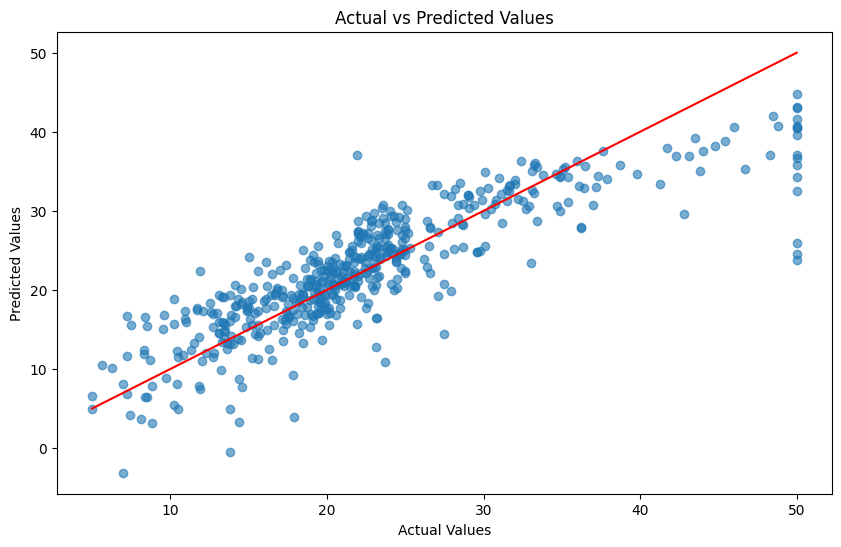

In [ ]:
# Plot the results
model.plot(y, yh)

In [ ]:
# Find the gradient to make sure it's 0, to make sure our calculations are correct
def gradient(X, y, yh):
    N, D = X.shape
    grad = np.dot(X.T, yh - y) / N
    return grad

print(gradient(X, y, yh))

# Get the magnitude of the gradient (the lowest it can be)
print(np.linalg.norm(gradient(X, y, yh)))

[[-2.18093440e-12]
 [-7.22378854e-12]
 [-2.44979408e-11]
 [-2.29389595e-11]
 [-2.06039840e-13]
 [-1.22554229e-12]
 [-1.35100293e-11]
 [-1.45918180e-10]
 [-8.14583886e-12]
 [-1.97702092e-11]
 [-8.71854023e-10]
 [-3.86554346e-11]
 [-2.66135045e-11]]
8.862554034164922e-10


### Mini Batch Stochastic Gradient Descent

In [ ]:
class MiniBatchSGDLinearRegression:
  def __init__(self, learning_rate=0.01, epochs=1000, batch_size=32):
      self.learning_rate = learning_rate
      self.epochs = epochs
      self.batch_size = batch_size
      self.theta = None

  def fit(self, X, y):

      # Add a bias term (intercept) to the feature matrix
      X_b = np.c_[np.ones((X.shape[0], 1)), X]

      # Initialize theta
      self.theta = np.random.randn(X_b.shape[1])

      for epoch in range(self.epochs):
          # Shuffle the dataset
          indices = np.random.permutation(len(X_b))
          X_b_shuffled = X_b[indices]
          y_shuffled = y[indices]

          # Process each mini-batch
          for i in range(0, len(X_b), self.batch_size):
              xi = X_b_shuffled[i:i+self.batch_size]
              yi = y_shuffled[i:i+self.batch_size]

              gradient = -2/len(xi) * xi.T.dot(yi - xi.dot(self.theta))
              self.theta -= self.learning_rate * gradient

  def predict(self, X):
      # Ensure the model has been trained
      if self.theta is None:
          raise ValueError("The model has not been trained yet.")

      # Add a bias term (intercept) to the feature matrix
      X_b = np.c_[np.ones((X.shape[0], 1)), X]

      # Compute predictions
      return X_b.dot(self.theta)


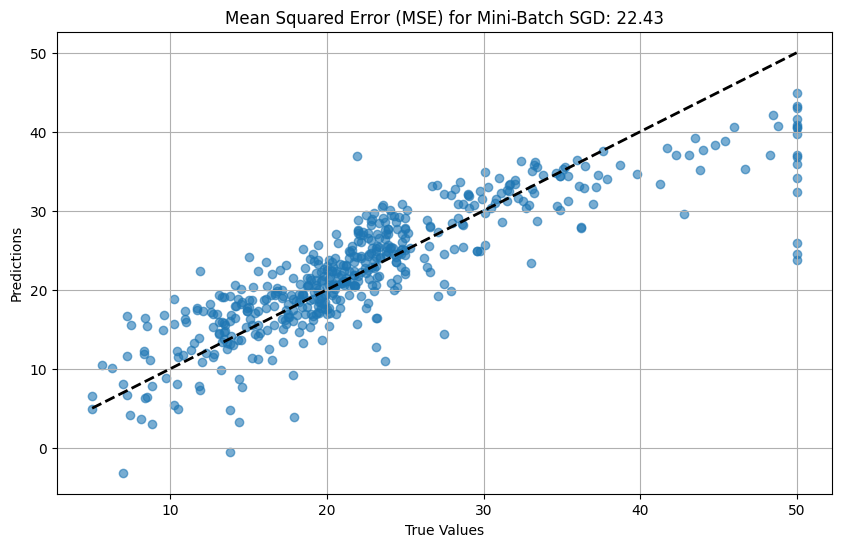

In [ ]:
# Test the class
# Normalize the features
X_normalized = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()

# Retraining the model with normalized features
sgd_model = MiniBatchSGDLinearRegression(learning_rate=0.01, epochs=1000, batch_size=32)
sgd_model.fit(X_normalized.values, df['MEDV'].values)
sgd_predictions = sgd_model.predict(X_normalized.values)

sgd_mse = mean_squared_error(df['MEDV'].values, sgd_predictions)

# Plotting true values vs. predictions for the mini-batch SGD model
plt.figure(figsize=(10, 6))
plt.scatter(df['MEDV'].values, sgd_predictions, alpha=0.6)
plt.plot([df['MEDV'].min(), df['MEDV'].max()],
         [df['MEDV'].min(), df['MEDV'].max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title(f'Mean Squared Error (MSE) for Mini-Batch SGD: {sgd_mse:.2f}')
plt.grid(True)
plt.show()

# **Task 3: Run experiments**

In [ ]:
def calculate_linear_regression_metrics(y_true, y_pred):
    """
    Compute metrics for evaluating the performance of a linear regression model.

    Parameters:
    - y_true: Actual target values.
    - y_pred: Predicted target values from the regression model.

    Returns:
    - mse: Mean Squared Error.
    - rmse: Root Mean Squared Error.
    - mae: Mean Absolute Error.
    - r2: R-squared value.
    """
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    r2 = 1 - (ss_res / ss_tot)

    return mse, rmse, mae, r2

def display_linear_regression_metrics(mse, rmse, mae, r2):
    print("-------------------------------------")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R-squared value: {r2}")
    print("-------------------------------------\n")


### 1. 80/20 train/test split

In [ ]:
# Shuffle the indices of our dataset
# Test the LinearRegression class
X = df.drop('MEDV', axis=1).values

# Add bias term to X
X = np.c_[np.ones((len(X), 1)), X]

y = df['MEDV'].values.reshape(-1, 1)


np.random.seed(42)  # for reproducibility
shuffled_indices = np.random.permutation(len(X))
train_indices = shuffled_indices[:int(0.8 * len(X))]
test_indices = shuffled_indices[int(0.8 * len(X)):]

# Split the data using the shuffled indices
X_train = X[train_indices]
y_train = y[train_indices]
X_test = X[test_indices]
y_test = y[test_indices]

# 2. Training on Training Data & Predicting on Both Sets

# Instantiate the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict on both the training and test data
y_train_pred = model.predict(X_train)
train_metrics = calculate_linear_regression_metrics(y_train, y_train_pred)

y_test_pred = model.predict(X_test)
test_metrics = calculate_linear_regression_metrics(y_test, y_test_pred)

# 3. Evaluation
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared value'],
    'Training': train_metrics,
    'Testing': test_metrics
})

print(metrics_df)

                    Metric   Training    Testing
0       Mean Squared Error  22.408805  23.065081
1  Root Mean Squared Error   4.733794   4.802612
2      Mean Absolute Error   3.425603   3.260658
3          R-squared value   0.744638   0.676061


### 2. 5-fold cross validation

In [ ]:
# 1. Shuffle the Data
np.random.seed(42)  # for reproducibility
shuffled_indices = np.random.permutation(len(X))
X_shuffled = X[shuffled_indices]
y_shuffled = y[shuffled_indices]

# 2. Split the Data into Folds
k = 5  # number of folds
fold_size = len(X) // k
folds_X = [X_shuffled[i * fold_size: (i + 1) * fold_size] for i in range(k)]
folds_y = [y_shuffled[i * fold_size: (i + 1) * fold_size] for i in range(k)]

# Initialize lists to store performance metrics for each fold
mse_train_list, rmse_train_list, mae_train_list, r2_train_list = [], [], [], []
mse_val_list, rmse_val_list, mae_val_list, r2_val_list = [], [], [], []

# 3. Train and Validate using Each Fold
for i in range(k):
    # Split data into training and validation for the current fold
    X_val = folds_X[i]
    y_val = folds_y[i]
    X_train = np.concatenate([folds_X[j] for j in range(k) if j != i])
    y_train = np.concatenate([folds_y[j] for j in range(k) if j != i])

    # Train the model on the training data
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on the training and validation data
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)

    # Calculate metrics for the training data
    mse_train, rmse_train, mae_train, r2_train = calculate_linear_regression_metrics(y_train, y_train_pred)
    mse_train_list.append(mse_train)
    rmse_train_list.append(rmse_train)
    mae_train_list.append(mae_train)
    r2_train_list.append(r2_train)

    # Calculate metrics for the validation data
    mse_val, rmse_val, mae_val, r2_val = calculate_linear_regression_metrics(y_val, y_val_pred)
    mse_val_list.append(mse_val)
    rmse_val_list.append(rmse_val)
    mae_val_list.append(mae_val)
    r2_val_list.append(r2_val)

# 4. Aggregate Results
avg_metrics_train = (np.mean(mse_train_list), np.mean(rmse_train_list), np.mean(mae_train_list), np.mean(r2_train_list))
avg_metrics_val = (np.mean(mse_val_list), np.mean(rmse_val_list), np.mean(mae_val_list), np.mean(r2_val_list))

# 4. Evaluation
metrics_df = pd.DataFrame({
    'Metric': ['Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R-squared value'],
    'Training Average': avg_metrics_train,
    'Testing Average': avg_metrics_val
})

print(metrics_df)


                    Metric  Training Average  Testing Average
0       Mean Squared Error         22.288877        23.816873
1  Root Mean Squared Error          4.720871         4.877350
2      Mean Absolute Error          3.349992         3.445955
3          R-squared value          0.736017         0.712087


### 3. Growing subsets of the training data (20%,30%,...80%)

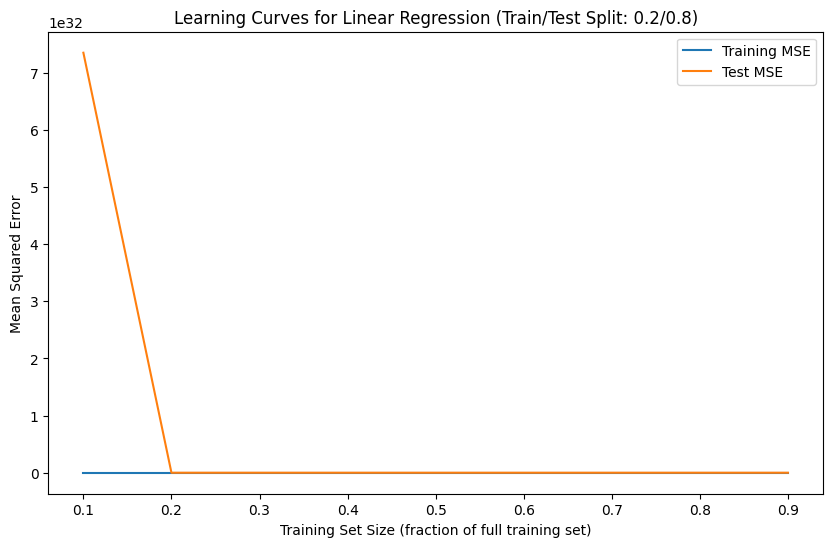

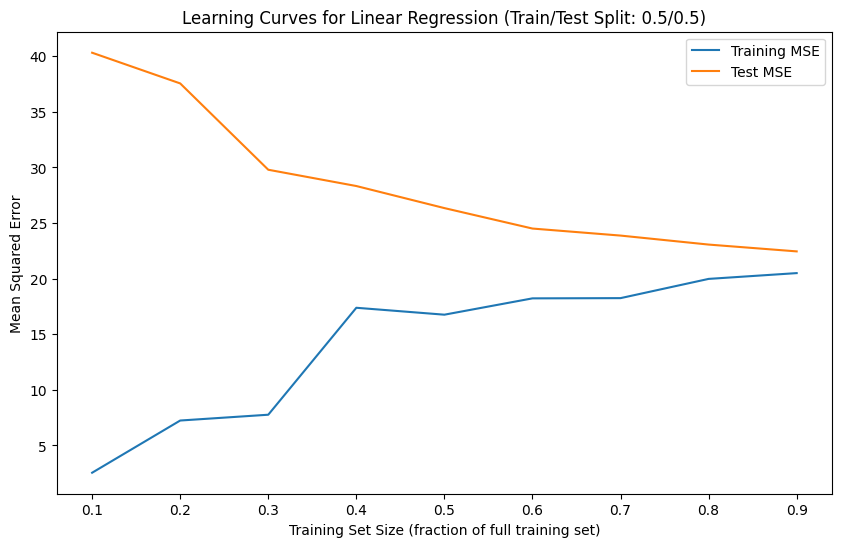

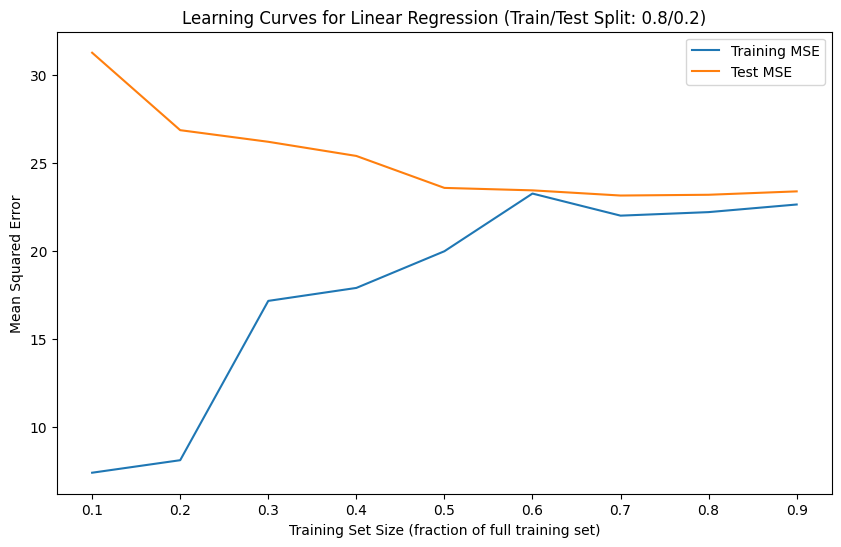

In [ ]:
split_ratios = [0.2, 0.5, 0.8]  # Define different train/test splits you want to try out

for split_ratio in split_ratios:
    # 1. Split the data
    np.random.seed(42)  # for reproducibility
    shuffled_indices = np.random.permutation(len(X))
    train_size = int(split_ratio * len(X))

    X_train_full = X[shuffled_indices[:train_size]]
    y_train_full = y[shuffled_indices[:train_size]]
    X_test = X[shuffled_indices[train_size:]]
    y_test = y[shuffled_indices[train_size:]]

    # 2. Initialize lists for storing results
    subset_sizes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
    mse_train_list, mse_test_list = [], []

    # 3. For each subset size
    for subset_size in subset_sizes:
        # Take a subset of the training data
        subset_size_int = int(subset_size * len(X_train_full))
        X_train_subset = X_train_full[:subset_size_int]
        y_train_subset = y_train_full[:subset_size_int]

        # Train the model on this subset
        model = LinearRegression()
        model.fit(X_train_subset, y_train_subset)

        # Evaluate the model
        y_train_subset_pred = model.predict(X_train_subset)
        y_test_pred = model.predict(X_test)

        mse_train = model.mse(y_train_subset, y_train_subset_pred)
        mse_test = model.mse(y_test, y_test_pred)

        mse_train_list.append(mse_train)
        mse_test_list.append(mse_test)

    # 4. Plot the results for this split ratio
    plt.figure(figsize=(10,6))
    plt.plot(subset_sizes, mse_train_list, label="Training MSE")
    plt.plot(subset_sizes, mse_test_list, label="Test MSE")
    plt.xlabel("Training Set Size (fraction of full training set)")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.title(f"Learning Curves for Linear Regression (Train/Test Split: {split_ratio}/{round(1-split_ratio, 1)})")
    plt.show()


### 4. Growing minibatch sizes, e.g., 8, 16, 32, 64, and 128

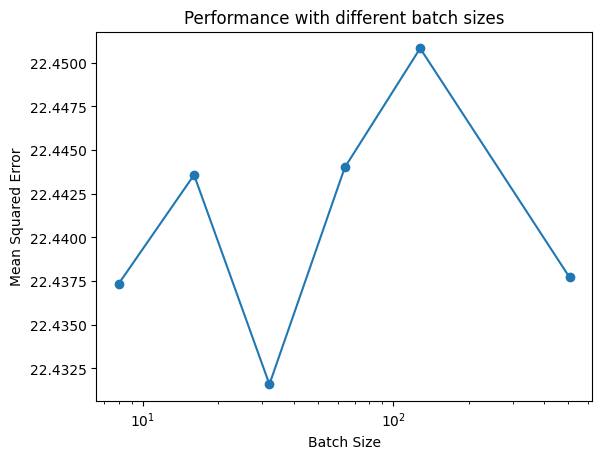

In [ ]:
# Normalize the features
X = (df.iloc[:, :-1] - df.iloc[:, :-1].mean()) / df.iloc[:, :-1].std()
y = df['MEDV'].values

# Initialize and train the model
mb_model = MiniBatchSGDLinearRegression()

# Assuming X and y have been defined previously
batch_sizes = [8, 16, 32, 64, 128, len(X)]  # adding len(X) simulates full batch GD as a baseline
results = []  # Store results for each batch size

for batch_size in batch_sizes:

    for _ in range(50):
        mse_list = []

        mb_model.fit(X, y)
        yh = mb_model.predict(X)

        # Evaluate the model
        sgd_mse = mean_squared_error(y, yh)
        mse_list.append(sgd_mse)

    sgd_mse = sum(mse_list) / len(mse_list)

    # Store the results
    results.append({
        "batch_size": batch_size,
        "MSE": sgd_mse
    })


# Your data plotting
plt.plot([res['batch_size'] for res in results], [res['MSE'] for res in results], marker='o')
plt.xticks(batch_sizes, batch_sizes)
plt.xlabel('Batch Size')
plt.ylabel('Mean Squared Error')
plt.title('Performance with different batch sizes')
plt.xscale('log')
plt.show()

### 5. Performance of linear regression with at least three different learning
rates

In [ ]:
def mean_squared_error(y_true, y_pred):
    """Compute the Mean Squared Error (MSE)"""
    return ((y_true - y_pred) ** 2).mean()

In [ ]:
# Learning rates to evaluate
learning_rates = [0.001, 0.01, 0.1]
mse_results = {}

# Training the model with different learning rates
for lr in learning_rates:
    sgd_model = MiniBatchSGDLinearRegression(learning_rate=lr, epochs=1000, batch_size=32)
    sgd_model.fit(X_normalized.values, df['MEDV'].values)
    sgd_predictions = sgd_model.predict(X_normalized.values)
    mse_results[lr] = mean_squared_error(df['MEDV'].values, sgd_predictions)

mse_results

{0.001: 22.459633875071592, 0.01: 22.441488722674578, 0.1: 34.76475771346152}

### 6. Performance metric selection and the optimal parameter choice

In [ ]:
# Parameter configurations
learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
batch_sizes = [16, 32, 64]

results = {}

# Training and evaluating for each parameter configuration
for lr in learning_rates:
    for batch_size in batch_sizes:
        sgd_model = MiniBatchSGDLinearRegression(learning_rate=lr, epochs=1000, batch_size=batch_size)
        sgd_model.fit(X_normalized.values, df['MEDV'].values)
        sgd_predictions = sgd_model.predict(X_normalized.values)
        mse = mean_squared_error(df['MEDV'].values, sgd_predictions)

        results[(lr, batch_size)] = mse

# Finding the optimal configuration
optimal_config = min(results, key=results.get)
optimal_mse = results[optimal_config]

optimal_config, optimal_mse

((0.005, 64), 22.430053607731775)

### 7. Enriching features with Gaussian Basis Functions

In [ ]:
# Splitting the dataset into training and testing sets
X = df.drop('MEDV', axis=1)
y = df['MEDV']

np.random.seed(42)
mask = np.random.rand(len(df)) < 0.8
X_train = X[mask]
X_test = X[~mask]
y_train = y[mask]
y_test = y[~mask]

# Parameters for Gaussian basis functions
s = 1
num_basis_functions = 5

# Select 5 random data points from the training set to serve as the centers for the Gaussian basis functions
centers = X_train.sample(n=num_basis_functions, random_state=42)

def gaussian_features(x, centers, s):
    """Compute the Gaussian features for a data point."""
    phi = np.exp(-np.sum((x - centers) ** 2, axis=1) / (2 * s ** 2))
    return phi

# Compute Gaussian features for training data
X_train_gaussian = np.array([gaussian_features(x, centers, s) for x in X_train.values])

# Combine the original and Gaussian features
X_train_combined = np.hstack((X_train.values, X_train_gaussian))

# Train the model on the original feature set
lr_original = LinearRegression()
lr_original.fit(X_train.values, y_train)
y_pred_original = lr_original.predict(X_test.values)

# Compute Gaussian features for test data
X_test_gaussian = np.array([gaussian_features(x, centers, s) for x in X_test.values])
X_test_combined = np.hstack((X_test.values, X_test_gaussian))

# Train the model on the combined feature set
lr_combined = LinearRegression()
lr_combined.fit(X_train_combined, y_train)
y_pred_combined = lr_combined.predict(X_test_combined)

# Compute MSE for both sets of predictions using the formula
mse_original = mean_squared_error(y_test, y_pred_original)
mse_combined = mean_squared_error(y_test, y_pred_combined)

print("MSE (original feature set):", mse_original)
print("MSE (combined feature set):", mse_combined)


MSE (original feature set): 26.481601746683133
MSE (combined feature set): 26.51153341234861
